In [1]:
import pandas as pd
import nasdaqdatalink
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from lib.nasdaq import Fundamentals, Tickers
from lib.equity.fundamentals import peer_percentiles

from lib.calendar import Calendar
cal = Calendar()



In [3]:
ticker = 'AMZN'

In [4]:
# ticker_data = nasdaqdatalink.get_table('SHARADAR/TICKERS', ticker = ticker)
query = Tickers().get()

Tickers data has been updated today - reading from file


In [5]:
ticker_data = query[query.ticker == ticker]
industry = ticker_data['industry'].iloc[0]
sector = ticker_data['sector'].iloc[0]

# Fundamentals

In [6]:
fun = Fundamentals(calendardate=cal.previous_quarter_end())
raw = query.merge(fun.get(), how='left', on='ticker')

Today: 2022-08-17 18:03:28.157831


## Reported

In [7]:
# Fundamentals(ticker = ticker, calendardate=cal.previous_quarter_end()).get()
# None

## Balance Sheet

In [8]:
bs_cols = []

## Income Statement

In [9]:
is_cols = []

## Cash Flow

In [10]:
cf_cols = []

## Percentile Ranks

In [11]:
unique_sectors_list, unique_industries_list, sector_percentile_frames, sector_rank_frames , industry_percentile_frames, industry_rank_frames = peer_percentiles.fundamental_peer_percentiles()

Tickers data has been updated today - reading from file
Today: 2022-08-17 18:03:34.917874
*****[ERROR]***** zero-size array to reduction operation maximum which has no identity
*****[ERROR]***** zero-size array to reduction operation maximum which has no identity
*****[ERROR]***** zero-size array to reduction operation maximum which has no identity


In [12]:
box_cols = [ 'ticker','roe','roa', 'expected roe growth','expected netinc growth']

### Sector

In [13]:
percentiles = sector_percentile_frames.get(sector)
percentiles#[box_cols[1:]]

,index,accoci,assets,assetsc,assetsnc,bvps,capex,cashneq,cashnequsd,cor,...,retained earnigns,retention ratio,equity reinvested,expected netinc growth,expected roe growth,equity reinvestment rate,expected ebit growth,sector,date,uid
0,low,"-53,669,000.00","1,709,000.00","80,005.00",0.00,-12.48,"-28,100,000.00","3,213.00","3,213.00",0.00,...,"-917,506,000.00",-0.37,"-816,799,000.00",-0.05,-0.19,-0.37,-0.04,Technology,2022-06-30,Technology 2022-06-30
1,Q1,"-21,647,500.00","140,931,250.00","75,770,500.00","46,112,250.00",1.16,"-11,883,000.00","23,035,000.00","23,035,000.00","8,718,500.00",...,"-335,079,000.00",0.02,"-262,634,065.25",-0.02,-0.06,0.02,-0.01,Technology,2022-06-30,Technology 2022-06-30
2,median,"-2,123,000.00","756,362,500.00","308,014,500.00","299,751,500.00",3.95,"-2,639,500.00","96,150,000.00","96,150,000.00","39,432,500.00",...,"-75,705,850.50",0.11,"-15,271,000.00",-0.00,-0.00,0.11,-0.00,Technology,2022-06-30,Technology 2022-06-30
3,Q3,0.00,"2,469,535,500.00","1,067,329,750.00","1,324,638,000.00",10.34,"-358,250.00","360,592,250.00","360,592,250.00","154,991,250.00",...,"54,594,500.00",0.28,"110,591,506.00",0.01,0.02,0.28,0.00,Technology,2022-06-30,Technology 2022-06-30
4,high,"29,177,000.00","5,930,828,000.00","2,459,483,000.00","3,145,900,000.00",23.91,"9,999,000.00","865,597,000.00","865,597,000.00","360,500,000.00",...,"628,830,000.00",0.68,"640,248,000.00",0.03,0.14,0.67,0.02,Technology,2022-06-30,Technology 2022-06-30


 0 Percentile Rank is Largest, 1000 Percentile Ranks is Smallest

In [14]:
ranks = sector_rank_frames.get(sector)
ranks = ranks.loc[ranks.ticker == ticker]
ranks

,ticker,accoci,assets,assetsc,assetsnc,bvps,capex,cashneq,cashnequsd,cor,...,retained earnigns,retention ratio,equity reinvested,expected netinc growth,expected roe growth,equity reinvestment rate,expected ebit growth,sector,date,uid
326,AMZN,0.01,1.00,1.00,1.00,0.79,0.00,1.00,1.00,1.00,...,0.99,0.09,0.00,0.78,0.49,0.08,0.80,Technology,2022-06-30,Technology 2022-06-30


In [16]:
sector_raw = raw[box_cols].loc[raw.sector == sector].dropna()

In [17]:
this_ticker =sector_raw[box_cols].loc[sector_raw.ticker == ticker] 
this_ticker

,ticker,roe,roa,expected roe growth,expected netinc growth
348,AMZN,-0.015434,-0.004832,-0.006178,0.006091


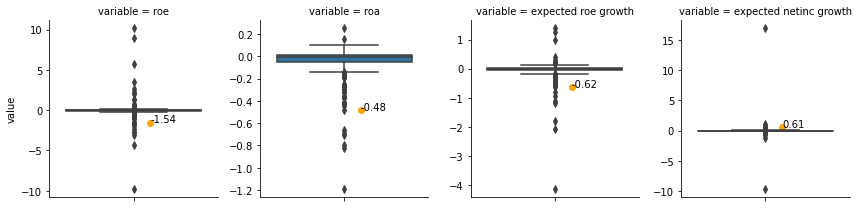

In [18]:

melt = sector_raw.melt(id_vars = 'ticker').dropna()
# melt.value = melt.value.divide(100)

def annotate(data, **kws):
    n = np.round(data.value.loc[data.ticker==ticker].values[0], 4)*100
    ax = plt.gca()
    ax.text(.1, n, f"{n}")
    ax.scatter(.1, n, color = 'orange')
        
g = sns.FacetGrid(melt, col="variable", sharey=False,  col_wrap=4)
g.map_dataframe(sns.boxplot, y="value")
g.map_dataframe(annotate)

### Industry

In [ ]:
percentiles = industry_percentile_frames.get(industry)
percentiles

In [ ]:
ranks = industry_rank_frames.get(industry)
ranks = ranks.loc[ranks.ticker == ticker]
ranks

In [ ]:
industry_raw = raw[box_cols].loc[raw.industry == industry].dropna()

melt = industry_raw.melt(id_vars = 'ticker').dropna()

sns.catplot(
    data=melt, y='value',
    col='variable', kind='box', col_wrap=2, sharey=False
)